In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt

### `yahoofinance`

In [2]:
stocks = ['AMZN', 'MSFT', 'INTC', 'GOOG', 'INFY.NS', '3988.HK']
start = datetime.datetime.today() - datetime.timedelta(30)
end = datetime.datetime.today()
cl_price = pd.DataFrame()
ohlcv_data = {}

for ticker in stocks:
    cl_price[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
ohlcv_data['MSFT'].head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-30,328.670013,329.809998,326.450012,328.790009,328.790009,15222100
2023-08-31,329.200012,330.910004,326.779999,327.760010,327.760010,26411000
2023-09-01,331.309998,331.989990,326.779999,328.660004,328.660004,14931200
2023-09-05,329.000000,334.850006,328.660004,333.549988,333.549988,18553900
2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800
2023-09-07,331.290009,333.079987,329.029999,329.910004,329.910004,18381000
2023-09-08,330.089996,336.160004,329.459991,334.269989,334.269989,19530100
2023-09-11,337.239990,338.420013,335.429993,337.940002,337.940002,16583300
2023-09-12,335.820007,336.790009,331.480011,331.769989,331.769989,17565500


### `yahoofinancials`

In [5]:
# !pip install yahoofinancials
from yahoofinancials import YahooFinancials

In [6]:
all_tickers = ['AAPL', 'MSFT', 'CSCO', 'AMZN', 'INTC']
close_prices = pd.DataFrame()
end_date = datetime.date.today().strftime('%Y-%m-%d')
beg_date = (datetime.date.today()-datetime.timedelta(1825)).strftime('%Y-%m-%d')

for ticker in all_tickers:
    yahoo_financials = YahooFinancials(ticker)
    json_obj = yahoo_financials.get_historical_price_data(beg_date, end_date, 'daily')
    ohlv = json_obj[ticker]['prices']
    temp = pd.DataFrame(ohlv)[['formatted_date', 'adjclose']]
    temp.set_index('formatted_date', inplace = True)
    temp.dropna(inplace = True)
    close_prices[ticker] = temp['adjclose']

In [7]:
close_prices

,AAPL,MSFT,CSCO,AMZN,INTC
formatted_date,,,,,
2018-09-27,53.860542,108.395638,41.548473,100.649002,39.894630
2018-09-28,54.049698,108.357750,41.823563,100.150002,41.120686
2018-10-01,54.413643,109.532562,42.012695,100.218002,40.390278
2018-10-02,54.897289,109.096764,42.133045,98.565498,41.825016
2018-10-03,55.565308,109.115692,42.244804,97.638000,42.398907
...,...,...,...,...,...
2023-09-19,179.070007,328.649994,55.840000,137.630005,36.340000
2023-09-20,175.490005,320.769989,55.500000,135.289993,34.689999
2023-09-21,173.929993,319.529999,53.340000,129.330002,34.650002


### `Alpha Vintage`

`access key is: HKHAP5J5RI45PWJ8`

In [8]:
# !pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import time

In [9]:
all_tickers = ['AAPL', 'MSFT', 'CSCO', 'AMZN', 'GOOG', 'INTC']
close_prices = pd.DataFrame()
api_call_count = 0
starttime = time.time()

for ticker in all_tickers:
    ts = TimeSeries(key = 'HKHAP5J5RI45PWJ8', output_format='pandas')
    data = ts.get_intraday(symbol=ticker, interval='1min', outputsize='compact')[0]
    data = data.iloc[::-1]
    api_call_count += 1
    data.columns = ['open', 'high', 'low', 'close', 'volumn']
    close_prices[ticker] = data['close']
    if api_call_count == 5:
        api_call_count = 0
        time.sleep(100 - ((time.time()-starttime) % 60.0))

In [10]:
close_prices

,AAPL,MSFT,CSCO,AMZN,GOOG,INTC
date,,,,,,
2023-09-26 18:20:00,172.040,312.13,NaN,125.950,129.640,NaN
2023-09-26 18:21:00,172.050,312.28,NaN,125.925,129.575,33.910
2023-09-26 18:22:00,172.055,312.29,NaN,125.950,129.630,33.870
2023-09-26 18:23:00,172.070,312.25,52.92,125.950,129.625,NaN
2023-09-26 18:24:00,172.070,312.25,NaN,125.910,129.625,33.900
...,...,...,...,...,...,...
2023-09-26 19:55:00,172.250,312.82,NaN,125.990,129.940,34.000
2023-09-26 19:56:00,172.170,312.50,NaN,125.990,129.950,33.955
2023-09-26 19:57:00,172.250,312.84,NaN,126.080,129.980,34.040


## Web Scraping Financial Data

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url = "https://finance.yahoo.com/quote/AAPL/financials?p=AAPL"
headers = {"User-Agent": "Chrome/116.0.5845.140"}
page = requests.get(url, headers = headers)
page

<Response [200]>

In [4]:
tickers = ['AAPL', 'FB', 'CSCO', 'INFY.NS', '3988.HK']
income_statement_dict = {}
balance_sheet_dict = {}
cashflow_st_dict = {}

for ticker in tickers:
    #scraping income statement
    url = "https://finance.yahoo.com/quote/{}/financials?p={}".format(ticker,ticker)
    income_statement = {}
    table_title = {}
    
    headers = {"User-Agent" : "Chrome/116.0.5845.140"}
    page = requests.get(url, headers=headers)
    page_content = page.content
    soup = BeautifulSoup(page_content,"html.parser")
    tabl = soup.find_all("div" , {"class" : "M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)"})
    for t in tabl:
        heading = t.find_all("div" , {"class": "D(tbr) C($primaryColor)"})
        for top_row in heading:
            table_title[top_row.get_text(separator="|").split("|")[0]] = top_row.get_text(separator="|").split("|")[1:]
        rows = t.find_all("div" , {"class": "D(tbr) fi-row Bgc($hoverBgColor):h"})
        for row in rows:
            income_statement[row.get_text(separator="|").split("|")[0]] = row.get_text(separator="|").split("|")[1:]

    temp = pd.DataFrame(income_statement).T
    temp.columns = table_title["Breakdown"]
    income_statement_dict[ticker] = temp
    
    #scraping balance sheet statement
    url = "https://finance.yahoo.com/quote/{}/balance-sheet?p={}".format(ticker,ticker)
    balance_sheet = {}
    table_title = {}
    
    headers = {"User-Agent" : "Chrome/116.0.5845.140"}
    page = requests.get(url, headers=headers)
    page_content = page.content
    soup = BeautifulSoup(page_content,"html.parser")
    tabl = soup.find_all("div" , {"class" : "M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)"})
    for t in tabl:
        heading = t.find_all("div" , {"class": "D(tbr) C($primaryColor)"})
        for top_row in heading:
            table_title[top_row.get_text(separator="|").split("|")[0]] = top_row.get_text(separator="|").split("|")[1:]
        rows = t.find_all("div" , {"class": "D(tbr) fi-row Bgc($hoverBgColor):h"})
        for row in rows:
            balance_sheet[row.get_text(separator="|").split("|")[0]] = row.get_text(separator="|").split("|")[1:]

    temp = pd.DataFrame(balance_sheet).T
    temp.columns = table_title["Breakdown"]
    balance_sheet_dict[ticker] = temp
    
    #scraping cashflow statement
    url = "https://finance.yahoo.com/quote/{}/cash-flow?p={}".format(ticker,ticker)
    cashflow_statement = {}
    table_title = {}
    
    headers = {"User-Agent" : "Chrome/116.0.5845.140"}
    page = requests.get(url, headers=headers)
    page_content = page.content
    soup = BeautifulSoup(page_content,"html.parser")
    tabl = soup.find_all("div" , {"class" : "M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)"})
    for t in tabl:
        heading = t.find_all("div" , {"class": "D(tbr) C($primaryColor)"})
        for top_row in heading:
            table_title[top_row.get_text(separator="|").split("|")[0]] = top_row.get_text(separator="|").split("|")[1:]
        rows = t.find_all("div" , {"class": "D(tbr) fi-row Bgc($hoverBgColor):h"})
        for row in rows:
            cashflow_statement[row.get_text(separator="|").split("|")[0]] = row.get_text(separator="|").split("|")[1:]

    temp = pd.DataFrame(cashflow_statement).T
    temp.columns = table_title["Breakdown"]
    cashflow_st_dict[ticker] = temp

In [5]:
#converting dataframe values to numeric
for ticker in tickers:
    for col in income_statement_dict[ticker].columns:
        income_statement_dict[ticker][col] = income_statement_dict[ticker][col].str.replace(',','').replace('-', '')
        income_statement_dict[ticker][col] = pd.to_numeric(income_statement_dict[ticker][col], errors = 'coerce')
        cashflow_st_dict[ticker][col] = cashflow_st_dict[ticker][col].str.replace(',','').replace('-', '')
        cashflow_st_dict[ticker][col] = pd.to_numeric(cashflow_st_dict[ticker][col], errors = 'coerce') 
        if col!="ttm": #yahoo has ttm column for income statement and cashflow statement only
            balance_sheet_dict[ticker][col] = balance_sheet_dict[ticker][col].str.replace(',','').replace('-', '')
            balance_sheet_dict[ticker][col] = pd.to_numeric(balance_sheet_dict[ticker][col], errors = 'coerce')

In [6]:
key_statistics = {}

for ticker in tickers:
    #scraping key statistics
    url = "https://finance.yahoo.com/quote/{}/key-statistics?p={}".format(ticker,ticker)    
    headers = {"User-Agent" : "Chrome/116.0.5845.140"}
    page = requests.get(url, headers=headers)
    page_content = page.content
    soup = BeautifulSoup(page_content,"html.parser")
    tabl = soup.find_all("table" , {"class" : "W(100%) Bdcl(c)"}) #remove/add the trailing space if getting error
    
    temp_stats = {}
    for t in tabl:
        rows = t.find_all("tr")
        for row in rows:
            temp_stats[row.get_text(separator="|").split("|")[0]] = row.get_text(separator="|").split("|")[-1]
    
    key_statistics[ticker] = temp_stats

In [30]:
# key_statistics['AAPL']

## Basic Data Handling and Operation

In [8]:
stocks = ['AMZN', 'MSFT', 'META', 'GOOG']
start = datetime.datetime.today()-datetime.timedelta(3650)
end = datetime.datetime.today()
cl_price = pd.DataFrame()
ohlcv_date = {}

for ticker in stocks:
    cl_price[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
cl_price.fillna(method = 'bfill', inplace = True)

In [10]:
daily_return = cl_price.pct_change()
daily_return.head()

,AMZN,MSFT,META,GOOG
Date,,,,
2013-09-30,NaN,NaN,NaN,NaN
2013-10-01,0.026580,0.009015,0.003783,0.012661
2013-10-02,-0.001371,0.010125,-0.002777,0.001116
2013-10-03,-0.017940,-0.001769,-0.021877,-0.013401
2013-10-04,0.013598,0.000591,0.037820,-0.004269


In [11]:
daily_return = cl_price/cl_price.shift(1) - 1
daily_return.head()

,AMZN,MSFT,META,GOOG
Date,,,,
2013-09-30,NaN,NaN,NaN,NaN
2013-10-01,0.026580,0.009015,0.003783,0.012661
2013-10-02,-0.001371,0.010125,-0.002777,0.001116
2013-10-03,-0.017940,-0.001769,-0.021877,-0.013401
2013-10-04,0.013598,0.000591,0.037820,-0.004269


In [12]:
daily_return.mean(), daily_return.std()

(AMZN    0.001049
 MSFT    0.001107
 META    0.000995
 GOOG    0.000863
 dtype: float64,
 AMZN    0.020933
 MSFT    0.017073
 META    0.023754
 GOOG    0.017628
 dtype: float64)

In [13]:
daily_return.mean(axis = 1).head()  ## mean of each row

Date
2013-09-30         NaN
2013-10-01    0.013010
2013-10-02    0.001773
2013-10-03   -0.013747
2013-10-04    0.011935
dtype: float64

`Rolling Operation` 

In [14]:
rolling_10d = daily_return.rolling(window=10).mean()
rolling_10d.head(15)

,AMZN,MSFT,META,GOOG
Date,,,,
2013-09-30,NaN,NaN,NaN,NaN
2013-10-01,NaN,NaN,NaN,NaN
2013-10-02,NaN,NaN,NaN,NaN
2013-10-03,NaN,NaN,NaN,NaN
2013-10-04,NaN,NaN,NaN,NaN
2013-10-07,NaN,NaN,NaN,NaN
2013-10-08,NaN,NaN,NaN,NaN
2013-10-09,NaN,NaN,NaN,NaN
2013-10-10,NaN,NaN,NaN,NaN


In [15]:
## Exponential Moving Average
ema = daily_return.ewm(com=10, min_periods = 10).mean()
ema.head(15)

,AMZN,MSFT,META,GOOG
Date,,,,
2013-09-30,NaN,NaN,NaN,NaN
2013-10-01,NaN,NaN,NaN,NaN
2013-10-02,NaN,NaN,NaN,NaN
2013-10-03,NaN,NaN,NaN,NaN
2013-10-04,NaN,NaN,NaN,NaN
2013-10-07,NaN,NaN,NaN,NaN
2013-10-08,NaN,NaN,NaN,NaN
2013-10-09,NaN,NaN,NaN,NaN
2013-10-10,NaN,NaN,NaN,NaN


`Visualization`

<Axes: xlabel='Date'>

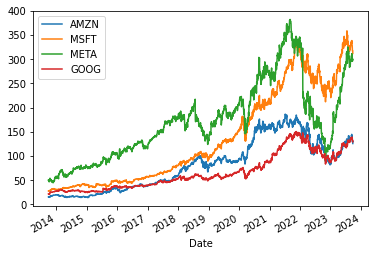

In [19]:
cl_price.plot()

<Figure size 1080x432 with 0 Axes>

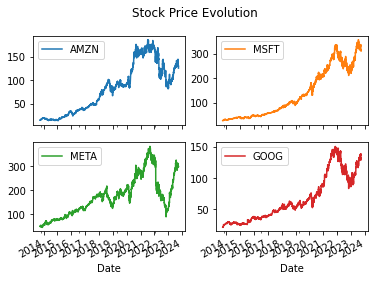

In [22]:
plt.figure(figsize=(15,6))
cl_price.plot(subplots = True, layout = (2,2), title = 'Stock Price Evolution')
plt.show()

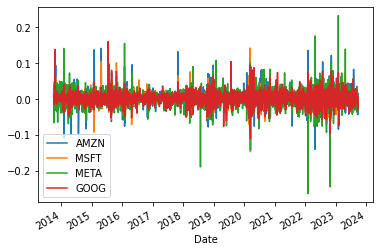

In [24]:
daily_return.plot()
plt.show()

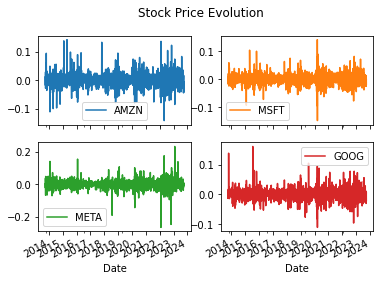

In [25]:
daily_return.plot(subplots = True, layout = (2,2), title = 'Stock Price Evolution')
plt.show()

<Axes: xlabel='Date'>

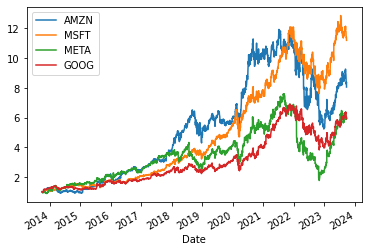

In [27]:
(1+daily_return).cumprod().plot()

<BarContainer object of 4 artists>

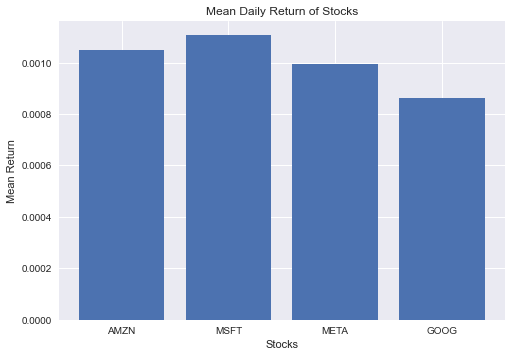

In [34]:
fig, ax = plt.subplots()
ax.set(title= 'Mean Daily Return of Stocks', xlabel = 'Stocks', ylabel = 'Mean Return')
# plt.style.available
plt.style.use('ggplot')
plt.bar(x=daily_return.columns, height=daily_return.mean())

## Technical Indicators
Mathematical calculations based on historic price, volume or open interest information to predict asset price prediction

* Lagging indicators: used to confirm trends
* Different from fundamental analysis in that this apporach is indiffeent about stock's financials or operation details since Effcient Market Hypothesis contends that all information is already priced in by the market

### MACD - Moving Average Covergence Divergence

* A trend following momentum indicator which is calculated by taking the difference of two moving averages of an asset price (typically 12 period MA and 26 period MA)

* A signal line is also calculated which is again a moving average (typically 9 period) of the MACD line

* **Crossover Strategy**: The MACD line cutting the signal line from below signals `bullish` period and the former cutting the latter from above signals `bearish` period

* Many false postives - especially during sideways market (*a stock market phase where the price rises and bounces back within the upper and lower limits*) --> be used in conjunction with other indicators

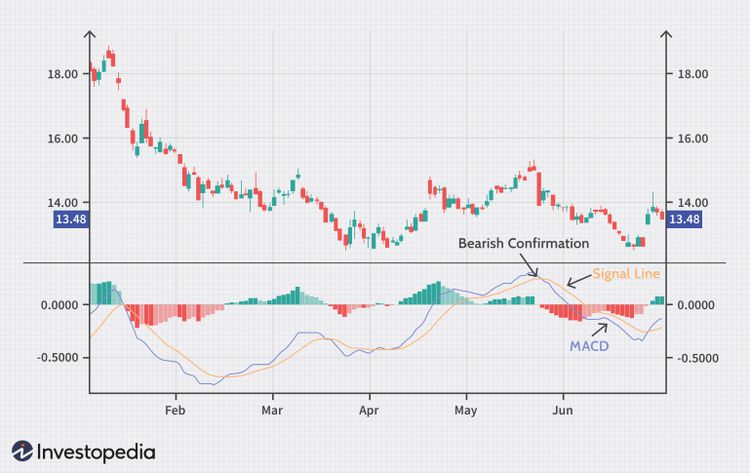

In [12]:
tickers = ['AMZN', 'GOOG', 'MSFT']
ohlcv_data = {}

for ticker in tickers:
    temp = yf.download(ticker, period = '1mo', interval = '15m')
    temp.dropna(how = 'any', inplace = True)
    ohlcv_data[ticker] = temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
ohlcv_data['GOOG'].head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-28 09:30:00,132.080002,133.240005,131.529999,132.380005,132.380005,2253154
2023-08-28 09:45:00,132.389999,132.800003,131.845001,132.110001,132.110001,1073517
2023-08-28 10:00:00,132.110001,132.330002,131.860001,132.149994,132.149994,868878
2023-08-28 10:15:00,132.169998,132.550003,132.130005,132.485001,132.485001,651505
2023-08-28 10:30:00,132.490005,132.610001,131.600006,131.710007,131.710007,647289


**MACD Calculation**
* MACD Line: (12-Day EMA - 26-Day EMA)
* Signal Line: 9-Day EMA of MACD Line
* MACD Histogram: MACD Line - Signal Line

In [13]:
def MACD(DF, fast=12, slow=26, signal=9):
    df = DF.copy()
    df['ma_fast'] = df['Adj Close'].ewm(span=fast, min_periods=fast).mean()
    df['ma_slow'] = df['Adj Close'].ewm(span=slow, min_periods=slow).mean()
    df['macd'] = df['ma_fast'] - df['ma_slow']
    df['signal'] = df['macd'].ewm(span=signal, min_periods=signal).mean()
    return df.loc[:, ['macd', 'signal']]

In [14]:
for ticker in ohlcv_data:
    ohlcv_data[ticker][['MACD', 'SIGNAL']] = MACD(ohlcv_data[ticker])

In [15]:
ohlcv_data['GOOG'].tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,SIGNAL
Datetime,,,,,,,,
2023-09-27 14:45:00,131.089996,131.220001,130.955002,131.029999,131.029999,480352,0.210320,0.151729
2023-09-27 15:00:00,131.029999,131.690002,130.979996,131.457794,131.457794,678534,0.276980,0.176779
2023-09-27 15:15:00,131.460007,131.720001,131.360001,131.410004,131.410004,523526,0.322237,0.205871
2023-09-27 15:30:00,131.399994,131.669998,130.839996,130.940002,130.940002,719610,0.316530,0.228003
2023-09-27 15:45:00,130.929993,131.479996,130.764999,131.460007,131.460007,1495926,0.349933,0.252389


### Bollinger Band & ATR (Average True Range)
* Both Bollinger Band and ATR are `volatility based indicators`
* Bollinger Band comprises two lines plotted *n* (n typically 2) standard deviations from a *m* period simple moving average line (m is typically 20). The bands widen during periods of increased volatility and shrink during period of reduced volatility
* ATR focuses on total price movement and conveys how wildly the market is swinging as it moves. It takes into account the following ranges
    * Difference between High and Low of each period
    * Difference between High and previous period's close
    * Difference between Low and previous period's close
    

In [25]:
tickers = ['AMZN', 'GOOG', 'MSFT']
ohlcv_data = {}

for ticker in tickers:
    temp = yf.download(ticker, period = '1mo', interval = '5m')
    temp.dropna(how = 'any', inplace = True)
    ohlcv_data[ticker] = temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**ATR Calculation**
* Current Period High - Current Period Low
* ABS(Current Period High - Previous Period Close)
* ABS(Current Period Low - Previous Period Close)
* True Range = MAX[(high - low), ABS(high - previous close), ABS(low - previous close)]
* ATR is an Exponential Moving Average of the True Range

In [3]:
def ATR(DF, n = 14):
    df = DF.copy()
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = df['High'] - df['Adj Close'].shift(1)
    df['L-PC'] = df['Low'] - df['Adj Close'].shift(1)
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis = 1, skipna=False)
    df['ATR'] = df['TR'].ewm(com=n, min_periods=n).mean()
    return df['ATR']

In [23]:
for ticker in ohlcv_data:
    ohlcv_data[ticker]['ATR'] = ATR(ohlcv_data[ticker])

In [24]:
ohlcv_data['GOOG'].tail()

,Open,High,Low,Close,Adj Close,Volume,ATR
Datetime,,,,,,,
2023-09-27 15:35:00-04:00,131.630005,131.630005,131.300003,131.350006,131.350006,226325,0.281242
2023-09-27 15:40:00-04:00,131.350006,131.360001,130.839996,130.940002,130.940002,295297,0.297160
2023-09-27 15:45:00-04:00,130.929993,131.020004,130.764999,131.009995,131.009995,214852,0.294350
2023-09-27 15:50:00-04:00,131.020004,131.440002,130.919998,131.399994,131.399994,521374,0.309393
2023-09-27 15:55:00-04:00,131.410004,131.479996,131.250000,131.460007,131.460007,759700,0.304100


**Bollinger Band Calculation**
* Middle Band = 20-Day Simple Moving Average
* Upper Band = 20-Day Simple Moving Average + 2 x Standard Deviation
* Lower Band = 20-Day Simple Moving Average - 2 x Standard Deviation

In [26]:
def BOLLINGER_BAND(DF, n=14):
    df = DF.copy()
    df['MB'] = df['Adj Close'].rolling(n).mean()
    df['UB'] = df['MB'] + 2 * df['Adj Close'].rolling(n).std(ddof=0) ## degree of freedom = 0 --> to get the population SD
    df['LB'] = df['MB'] - 2 * df['Adj Close'].rolling(n).std(ddof=0)
    df['BB_Width'] = df['UB'] - df['LB']
    return df[['MB', 'UB', 'LB', 'BB_Width']]

In [28]:
for ticker in ohlcv_data:
    ohlcv_data[ticker][['MB', 'UB', 'LB', 'BB_Width']] = BOLLINGER_BAND(ohlcv_data[ticker], n=20)

In [29]:
ohlcv_data['GOOG'].tail()

,Open,High,Low,Close,Adj Close,Volume,MB,UB,LB,BB_Width
Datetime,,,,,,,,,,
2023-09-27 15:35:00-04:00,131.630005,131.630005,131.300003,131.350006,131.350006,226325,130.862200,132.163291,129.561109,2.602182
2023-09-27 15:40:00-04:00,131.350006,131.360001,130.839996,130.940002,130.940002,295297,130.912450,132.142087,129.682814,2.459274
2023-09-27 15:45:00-04:00,130.929993,131.020004,130.764999,131.009995,131.009995,214852,130.976445,132.080048,129.872842,2.207206
2023-09-27 15:50:00-04:00,131.020004,131.440002,130.919998,131.399994,131.399994,521374,131.056445,132.031850,130.081040,1.950810
2023-09-27 15:55:00-04:00,131.410004,131.479996,131.250000,131.460007,131.460007,759700,131.136445,131.956257,130.316633,1.639624


### RSI - Relative Strength Index
* RSI is a momentum oscillator which measures the speed and change of price movements
* RSI value oscillates between 0 and 100 with values above *70* indicating that the asset has now reached `overbought` territory. Values below *30* signify `oversold` territory.

In [31]:
tickers = ['AMZN', 'GOOG', 'MSFT']
ohlcv_data = {}

for ticker in tickers:
    temp = yf.download(ticker, period = '1mo', interval = '5m')
    temp.dropna(how = 'any', inplace = True)
    ohlcv_data[ticker] = temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**RSI Calculation**
* RS = Average Gain of N-Day / Average Loss of N-Day
    * gain = change(Close) > 0
    * loss = change(Close) < 0
* RSI = 100 - 100 / (1 + RS)

##### Calculation follows a `two-step` method

$RSI (step\ one) = 100 - \Big[\frac{100}{1+\frac{AvgGain}{AvgLoss}}\Big]$

<ins>  Once there are enough periods, the step-two formula below should be used to act as a smoothing technique (similar to calculating exponential MA) </ins>

$RSI (step\ two) = 100 - \Bigg[\frac{100}{1+\frac{Previous\ AvgGain\ \times\ 13\ +\ Current\ Gain}{Previous\ AvgLoss\ \times\ 13\ +\ Current\ Loss}}\Bigg]$

In [35]:
def RSI(DF, n=14):
    df = DF.copy()
    df['change'] = df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain'] = np.where(df['change'] >= 0, df['change'], 0)
    df['loss'] = np.where(df['change'] < 0, -1*df['change'], 0)
    df['avgGain'] = df['gain'].ewm(alpha = 1/n, min_periods = n).mean()
    df['avgLoss'] = df['loss'].ewm(alpha = 1/n, min_periods = n).mean()
    df['rs'] = df['avgGain'] / df['avgLoss']
    df['rsi'] = 100 - (100/(1+df['rs']))
    return df['rsi']

In [36]:
for ticker in ohlcv_data:
    ohlcv_data[ticker]['RSI'] = RSI(ohlcv_data[ticker])

In [37]:
ohlcv_data['GOOG'].tail()

,Open,High,Low,Close,Adj Close,Volume,RSI
Datetime,,,,,,,
2023-09-27 15:35:00-04:00,131.630005,131.630005,131.300003,131.350006,131.350006,226325,60.651891
2023-09-27 15:40:00-04:00,131.350006,131.360001,130.839996,130.940002,130.940002,295297,50.661858
2023-09-27 15:45:00-04:00,130.929993,131.020004,130.764999,131.009995,131.009995,214852,52.111950
2023-09-27 15:50:00-04:00,131.020004,131.440002,130.919998,131.399994,131.399994,521374,59.291505
2023-09-27 15:55:00-04:00,131.410004,131.479996,131.250000,131.460007,131.460007,759700,60.278380


### ADX - Average Directional Index
* ADX is a way to measure the strength of a trend
* Values range from 0 to 100 and quantify the strength of a trend as per below:
    * 0 - 25: Absent or weak trend
    * 25 - 50: Strong trend
    * 50 - 75: Very strong trend
    * 75 - 100: Extremely trend
* ADX is non-directional meaning the value makes no inference about the direction of the trend but only about the strength of the trend

In [5]:
tickers = ['AMZN', 'GOOG', 'MSFT']
ohlcv_data = {}

for ticker in tickers:
    temp = yf.download(ticker, period = '1mo', interval = '5m')
    temp.dropna(how = 'any', inplace = True)
    ohlcv_data[ticker] = temp 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### ADX Calculation
* UpMove = Current High - Previous High
* DownMove = Previous Low - Current Low
* If UpMove > DownMove and UpMove > 0, then +DM = UpMove, else +DM = 0
* If DownMove > Upmove and Downmove > 0, then -DM = DownMove, else -DM = 0
* +DI = 100 times Exponential Moving Average of (+DM / Average True Range)
* -DI = 100 times Exponential Moving Average of (-DM / Average True Range)
* ADX = 100 times the Exponential Moving Average of the Absolute Value of (+DI - -DI) / (+DI + -DI)

In [6]:
def ATR(DF, n = 14):
    df = DF.copy()
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = df['High'] - df['Adj Close'].shift(1)
    df['L-PC'] = df['Low'] - df['Adj Close'].shift(1)
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis = 1, skipna=False)
    df['ATR'] = df['TR'].ewm(com=n, min_periods=n).mean()
    return df['ATR']

def ADX(DF, n = 14):
    df = DF.copy()
    df['ATR'] = ATR(df, n)
    df['upmove'] = df['High'] - df['High'].shift(1)
    df['downmove'] = df['Low'].shift(1) - df['Low']
    df['+dm'] = np.where(((df['upmove'] > df['downmove']) & (df['upmove']>0)), df['upmove'], 0)
    df['-dm'] = np.where(((df['downmove'] > df['upmove']) & (df['downmove']>0)), df['downmove'], 0)
    df['+di'] = 100 * (df['+dm']/df['ATR']).ewm(com = n, min_periods = n).mean()
    df['-di'] = 100 * (df['-dm']/df['ATR']).ewm(com = n, min_periods = n).mean()
    df['ADX'] = 100 * (abs((df['+di']-df['-di'])/(df['+di']+df['-di']))).ewm(span = n, min_periods = n).mean()
    return df['ADX']

In [7]:
for ticker in ohlcv_data:
    ohlcv_data[ticker]['ADX'] = ADX(ohlcv_data[ticker], 20)

In [8]:
ohlcv_data['GOOG'].tail()

,Open,High,Low,Close,Adj Close,Volume,ADX
Datetime,,,,,,,
2023-09-28 15:35:00-04:00,133.455002,133.490005,133.014999,133.020004,133.020004,202368,12.637913
2023-09-28 15:40:00-04:00,133.029999,133.205002,132.970001,133.160004,133.160004,319874,12.494635
2023-09-28 15:45:00-04:00,133.164993,133.199997,132.899994,132.960007,132.960007,272314,12.615750
2023-09-28 15:50:00-04:00,132.960007,133.115005,132.899994,132.990005,132.990005,387916,12.725330
2023-09-28 15:55:00-04:00,132.990005,133.320007,132.985001,133.139999,133.139999,884024,11.883578


### Renko Chart
* Renko chart is built using price movement and not price against standardized time intervals - This fillters out the noise and lets you visualize the true trend
* Price movements (fixed) are represented as bricks stacked at 45 degrees to each other. A new brick is added to the chart only when the price moves by a predetermined amount in either direction
* Renko charts have a time axis, but the time scale is `not fixed`. Some bricks may take longer to form than others, depending on how long it takes the price to move the required box size
* Renko charts typically use only the `closing price` based on the chart time frame chosen

In [11]:
from stocktrends import Renko

In [12]:
tickers = ['AMZN', 'GOOG', 'MSFT']
ohlcv_data = {}
hour_data = {}

for ticker in tickers:
    temp = yf.download(ticker, period = '1mo', interval = '5m')
    temp.dropna(how = 'any', inplace = True)
    ohlcv_data[ticker] = temp
    temp = yf.download(ticker, period = '1y', interval = '1h')
    temp.dropna(how = 'any', inplace = True)
    hour_data[ticker] = temp 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [14]:
def ATR(DF, n = 14):
    df = DF.copy()
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = df['High'] - df['Adj Close'].shift(1)
    df['L-PC'] = df['Low'] - df['Adj Close'].shift(1)
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis = 1, skipna=False)
    df['ATR'] = df['TR'].ewm(com=n, min_periods=n).mean()
    return df['ATR']

def renko_DF(DF, hourly_df):
    df = DF.copy()
    df.drop('Close', axis = 1, inplace = True)
    df.reset_index(inplace = True)
    df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    df2 = Renko(df)
    df2.brick_size = 3 * round(ATR(hourly_df, 120).iloc[-1], 0) ## get the latest ATR
    renko_df = df2.get_ohlc_data()
    return renko_df 

In [16]:
renko_data = {}
for ticker in ohlcv_data:
    renko_data[ticker] = renko_DF(ohlcv_data[ticker], hour_data[ticker])

In [18]:
## The uptrend column indicates the color of the brick.
    # True --> green brick
    # False --> red brick
renko_data['GOOG']

,date,open,high,low,close,uptrend
0,2023-08-29 09:30:00-04:00,129.0,132.0,129.0,132.0,True
1,2023-08-29 10:30:00-04:00,132.0,135.0,132.0,135.0,True
2,2023-08-31 10:10:00-04:00,135.0,138.0,135.0,138.0,True
3,2023-09-21 09:50:00-04:00,135.0,135.0,132.0,132.0,False
4,2023-09-26 10:10:00-04:00,132.0,132.0,129.0,129.0,False


In [19]:
ATR(hour_data['GOOG'], 120).iloc[-1]

0.9219038062765733

### TA-Lib

installation guide: https://blog.quantinsti.com/install-ta-lib-python/

In [7]:
import talib
from alpha_vantage.timeseries import TimeSeries
import copy

In [9]:
tickers = ["MSFT","AAPL","META","AMZN","INTC", "CSCO","VZ","IBM","QCOM","LYFT"]

# Extract OHLCV data for the tickers
ohlc_tech = {} # directory with ohlc value for each stock            
ts = TimeSeries(key='HKHAP5J5RI45PWJ8', output_format='pandas')

attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <=5:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            ohlc_tech[tickers[i]] = ts.get_intraday(symbol=tickers[i], interval='30min', outputsize='full')[0]
            ohlc_tech[tickers[i]].columns = ["Open","High","Low","Adj Close","Volume"]
            drop.append(tickers[i])      
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1
    
tickers = ohlc_tech.keys() # redefine tickers variable after removing any tickers with corrupted data
ohlc_dict = copy.deepcopy(ohlc_tech) #create a copy of extracted data

CSCO  :failed to fetch data...retrying
VZ  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
QCOM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
VZ  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
QCOM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
VZ  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
QCOM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
VZ  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
QCOM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
VZ  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
QCOM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
V

In [12]:
# Apply talib functions on each dataframe - refer documentation at https://mrjbq7.github.io/ta-lib/doc_index.html
for ticker in tickers:
    # Calculate momentum indicators (e.g. MACD, ADX, RSI etc.) using talib
    ohlc_dict[ticker]["ADX"] = talib.ADX(ohlc_dict[ticker]["High"],
                                        ohlc_dict[ticker]["Low"],
                                        ohlc_dict[ticker]["Adj Close"],
                                        timeperiod=14)
    # Identify chart patterns (e.g. two crows, three crows, three inside, engulging pattern etc.)
    ohlc_dict[ticker]["3I"] = talib.CDL3WHITESOLDIERS(ohlc_dict[ticker]["Open"],
                                                 ohlc_dict[ticker]["High"],
                                                 ohlc_dict[ticker]["Low"],
                                                 ohlc_dict[ticker]["Adj Close"])
    
    # Statistical functions (e.g. beta, correlation etc.)
    ohlc_dict[ticker]["Beta"] = talib.BETA(ohlc_dict[ticker]["High"],
                                         ohlc_dict[ticker]["Low"],
                                         timeperiod=14)

In [13]:
ohlc_dict['AAPL']

,Open,High,Low,Adj Close,Volume,ADX,3I,Beta
date,,,,,,,,
2023-09-28 19:30:00,170.92,174.463,161.34,170.85,15530.0,NaN,0,NaN
2023-09-28 19:00:00,170.99,171.050,170.80,170.97,11195.0,NaN,0,NaN
2023-09-28 18:30:00,171.15,171.190,170.95,171.00,26085.0,NaN,0,NaN
2023-09-28 18:00:00,170.97,171.240,170.94,171.15,23424.0,NaN,0,NaN
2023-09-28 17:30:00,170.94,170.980,170.69,170.97,6486.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...
2023-09-07 06:00:00,177.92,178.900,177.85,177.99,105192.0,33.591965,0,0.147719
2023-09-07 05:30:00,177.83,178.370,177.77,177.93,83372.0,32.037606,0,0.142868
2023-09-07 05:00:00,177.88,178.200,177.21,177.82,119520.0,30.172085,0,0.144561


## Performance Measurement - KPIs
Measuring expected performance of a trading strategy by testing it on historical data and mimicking actual trading conditions

### CAGR - Compound Annual Growth Rate
* CAGR is the annual rate of return realized by an asset / portfolio to reach its current market value from its initial value
* CAGR calculation assumes profits are `continuously reinvested`
    
    $CAGR = \Bigg[\frac{End\ Value}{Beginning\ Value}\Bigg]^{\frac{1}{Number\ of\ Years}} - 1$

* Does not reflect investment risk and therefore should always be used in conjunction with a volatility measure

In [2]:
tickers = ['AMZN', 'GOOG', 'MSFT']
ohlcv_data = {}

for ticker in tickers:
    temp = yf.download(ticker, period = '7mo', interval = '1d')
    temp.dropna(how = 'any', inplace = True)
    ohlcv_data[ticker] = temp 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
def CAGR(DF):
    df = DF.copy()
    df['return'] = df['Adj Close'].pct_change()
    df['cum_return'] = (1+df['return']).cumprod()
    n = len(df)/252. ## 252 is the rough number of trading days within a year
    CAGR = (df['cum_return'][-1]) ** (1/n) - 1
    return CAGR

In [12]:
for ticker in ohlcv_data:
    print("CAGR for {} = {}".format(ticker, CAGR(ohlcv_data[ticker])))

CAGR for AMZN = 0.6592335639988016
CAGR for GOOG = 0.8968490251244552
CAGR for MSFT = 0.5009438088104274


### Annualized Volatility
* Volatility of a strategy is represented by the standard deviation of the returns. This captures the variability of returns from the mean return
* Annualization is achieved by multiplying volatility with square root of the `annualization factor`
    * To annualize daily volatility mutiply with $\sqrt{252}$ - 252 trading days in a year
    * To annualize weekly volatility mutiply with $\sqrt{52}$ - 52 trading weeks in a year
    * To annualize monthly volatility mutiply with $\sqrt{12}$ - 12 trading months in a year
* This approach assumes `normal distribution of return` which not true
* Do not capture tail risk

In [10]:
def volatility(DF):
    df = DF.copy()
    df['return'] = df['Adj Close'].pct_change()
    vol = df['return'].std() * np.sqrt(252)
    return vol

In [11]:
for ticker in ohlcv_data:
    print("Volatility for {} = {}".format(ticker, volatility(ohlcv_data[ticker])))

Volatility for AMZN = 0.3143492029058195
Volatility for GOOG = 0.27011060079390303
Volatility for MSFT = 0.2466601622528976


### Sharpe Ratio & Sortino Ratio
* Sharpe ratio is the average return earned in excess of the risk free rate per unit of volatility, which is a widely-used measure of risk adjusted return
    * The risk free rate of return differs jurisdiction by jurisdiction
        * For US market, 30-year government bond return is used
* Sharpe ratio greater than 1 is considered good, greater than 2 very good and greater than 3 excellent

    $Sharpe\ Ratio\ =\ \frac{R_{p}\ -\ R_{f}}{\sigma_{p}}$
    
    $R_{p}\ =\ Expected\ Return$
    
    $R_{f}\ =\ Risk\ Free\ Rate\ of\ Return$
    
    $\sigma_{p}\ =\ Standard\ Deviation\ of\ Asset\ Returns$


* Sortino ratio is a variation of Sharpe ratio, which takes into account standard deviation of only negative returns
* One of the criticism of Sharpe ration is that it fails to distinguish between upside and downside fluctuation

    $Sortino\ Ratio\ =\ \frac{R_{p}\ -\ R_{f}}{\sigma_{p}}$
    
    $R_{p}\ =\ Expected\ Return$
    
    $R_{f}\ =\ Risk\ Free\ Rate\ of\ Return$
    
    $\sigma_{p}\ =\ Standard\ Deviation\ of\ Negative\ Asset\ Returns$

In [9]:
def CAGR(DF):
    df = DF.copy()
    df['return'] = df['Adj Close'].pct_change()
    df['cum_return'] = (1+df['return']).cumprod()
    n = len(df)/252. ## 252 is the rough number of trading days within a year
    CAGR = (df['cum_return'][-1]) ** (1/n) - 1
    return CAGR

def volatility(DF):
    df = DF.copy()
    df['return'] = df['Adj Close'].pct_change()
    vol = df['return'].std() * np.sqrt(252)
    return vol

def sharpe(DF, rf = 0.044):
    df = DF.copy()
    sharpe = (CAGR(df) - rf) / volatility(df)  ## 0.044 is the 30-year US government bond yield
    return sharpe


def sortino(DF, rf = 0.044):
    df = DF.copy()
    df['return'] = df['Adj Close'].pct_change()
    df['neg_return'] = np.where(df['return']>0, 0, df['return'])
    neg_vola = df[df['neg_return'] != 0]['neg_return'].std()* np.sqrt(252)
    sortino = (CAGR(df) - rf) / neg_vola
    return sortino

In [10]:
for ticker in ohlcv_data:
    print("Sharpe Ratio for {} = {}".format(ticker, sharpe(ohlcv_data[ticker])))
    print("Sortino Ratio for {} = {}".format(ticker, sortino(ohlcv_data[ticker])))

Sharpe Ratio for AMZN = 1.957165974373819
Sortino Ratio for AMZN = 3.416790030564801
Sharpe Ratio for GOOG = 3.1574067164257174
Sortino Ratio for GOOG = 5.751444116419513
Sharpe Ratio for MSFT = 1.8525237502354703
Sortino Ratio for MSFT = 3.480592377515171


### Maximum Drawdown & Calmar Ratio
* Maximum drawdown is the largest drop in asset price over a specified time period (distance between `peak` and `trough` in the line curve of the asset)
    * The peak needs to come `before` the trough
* Maximum drawdown is an indicator used to assess the `relative riskiness` of one stock screening strategy versus another, as it focuses on `capital preservation` (*a conservative investment strategy where the primary goal is to preserve capital and prevent loss in a portfolio*)
* Investment with longer backtesting period will likely have larger max drawdown and therefore caution must be applied across strategies
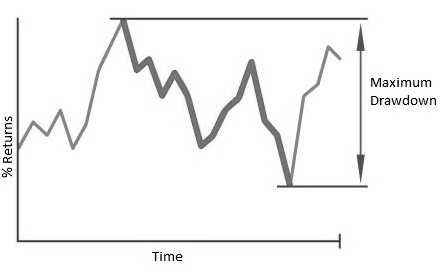

* Calmar ratio is the ratio of `CAGR` and `Max Drawdown`, and it's a measure of risk adjusted return

    $Calmar\ Ratio\ =\ \frac{CAGR}{Maximum\ Drawdown}$

In [7]:
def CAGR(DF):
    df = DF.copy()
    df['return'] = df['Adj Close'].pct_change()
    df['cum_return'] = (1+df['return']).cumprod()
    n = len(df)/252. ## 252 is the rough number of trading days within a year
    CAGR = (df['cum_return'][-1]) ** (1/n) - 1
    return CAGR

def MAX_DD(DF):
    df = DF.copy()
    df['return'] = df['Adj Close'].pct_change()
    df['cum_return'] = (1+df['return']).cumprod()
    df['cum_rolling_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_rolling_max'] - df['cum_return']
    return (df['drawdown']/df['cum_rolling_max']).max()

def calmar(DF):
    df = DF.copy()
    return CAGR(df) / MAX_DD(df)

In [8]:
for ticker in ohlcv_data:
    print("Maximum Drawdown for {} = {}".format(ticker, MAX_DD(ohlcv_data[ticker])))
    print("Calmar Ratio for {} = {}".format(ticker, calmar(ohlcv_data[ticker])))

Maximum Drawdown for AMZN = 0.13027270936458762
Calmar Ratio for AMZN = 5.060411863806702
Maximum Drawdown for GOOG = 0.08631069188842262
Calmar Ratio for GOOG = 10.390937733228332
Maximum Drawdown for MSFT = 0.12987593237872266
Calmar Ratio for MSFT = 3.857094995473512


## Backtesting
Test the strategy by applying the rules and trading signal criteria on historical data mimcking actual trading conditions

### Strategy I - Monthly Portfolio Rebalancing
* Choose any universe of stocks (Large cap, mid cap, industry specific, factor specific, etc.) and stick to this group of stocks as the source for your portfolio for the entire duration of backtesting
    * To eliminate `survivorship bias`, we should pick up the same number of stocks of the same index of stocks that were existing at that point of time when doing backtesing
* Build fixed individual position sized long only portfolio by picking **m** number of stocks based on monthly returns (or any other suitable criterion)
* Rebalance the portfolio every month by removing *worse* **x** stocks and replacing them with *top* **x** stocks from the universe of stocks 
    * The existing stock can be picked again
* Backtest the strategy and compare the KPIs with that of simple buy and hold strategy of corresponding index

In [37]:
 def CAGR(DF):
    df = DF.copy()
    df['cum_return'] = (1+df['mon_ret']).cumprod()
    n = len(df)/12.
    CAGR = (df['cum_return'].tolist()[-1]) ** (1/n) - 1
    return CAGR

def volatility(DF):
    df = DF.copy()
    vol = df['mon_ret'].std() * np.sqrt(12)
    return vol

def sharpe(DF, rf):
    df = DF.copy()
    sharpe = (CAGR(df) - rf) / volatility(df)
    return sharpe


def MAX_DD(DF):
    df = DF.copy()
    df['cum_return'] = (1+df['mon_ret']).cumprod()
    df['cum_rolling_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_rolling_max'] - df['cum_return']
    return (df['drawdown']/df['cum_rolling_max']).max()

In [19]:
# Download historical data (monthly) for DJI constituent stocks

tickers = ["MMM","AXP","T","BA","CAT","CSCO","KO", "XOM","GE","GS","HD",
           "IBM","INTC","JNJ","JPM","MCD","MRK","MSFT","NKE","PFE","PG","TRV",
           "UNH","VZ","V","WMT","DIS"]

ohlc_mon = {} # directory with ohlc value for each stock            
start = datetime.datetime.today()-datetime.timedelta(1900)
end = datetime.datetime.today()

# Looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    ohlc_mon[ticker] = yf.download(ticker,start,end,interval='1mo')
    ohlc_mon[ticker].dropna(inplace=True,how="all")

tickers = ohlc_mon.keys() # redefine tickers variable after removing any tickers with corrupted data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [20]:
ohlc_mon['MMM'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,210.979996,211.720001,197.110001,210.919998,172.852036,39291800
2018-09-01,210.550003,217.869995,205.899994,210.710007,173.837402,45069500
2018-10-01,212.399994,217.339996,181.979996,190.259995,156.966003,67294100
2018-11-01,190.610001,209.770004,190.089996,207.919998,171.535583,51077500
2018-12-01,211.210007,211.949997,176.869995,190.539993,158.270493,51330100


In [28]:
# Calculating KPIs for Index buy and hold strategy over the same period
DJI = yf.download("^DJI", datetime.date.today()-datetime.timedelta(1900),datetime.date.today(),interval='1mo')
DJI["mon_ret"] = 6DJI["Adj Close"].pct_change().fillna(0)
CAGR(DJI), sharpe(DJI, 0.02), MAX_DD(DJI)

[*********************100%%**********************]  1 of 1 completed


(0.0505985125263646, 0.16716275239519138, 0.2320126616506341)

In [32]:
################################Backtesting####################################
# Calculating monthly return for each stock and consolidating return info by stock in a separate dataframe
ohlc_dict = copy.deepcopy(ohlc_mon)
return_df = pd.DataFrame()
for ticker in tickers:
    print("calculating monthly return for ",ticker)
    ohlc_dict[ticker]["mon_ret"] = ohlc_dict[ticker]["Adj Close"].pct_change()
    return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
    return_df.dropna(inplace=True)

return_df.head()

calculating monthly return for  MMM
calculating monthly return for  AXP
calculating monthly return for  T
calculating monthly return for  BA
calculating monthly return for  CAT
calculating monthly return for  CSCO
calculating monthly return for  KO
calculating monthly return for  XOM
calculating monthly return for  GE
calculating monthly return for  GS
calculating monthly return for  HD
calculating monthly return for  IBM
calculating monthly return for  INTC
calculating monthly return for  JNJ
calculating monthly return for  JPM
calculating monthly return for  MCD
calculating monthly return for  MRK
calculating monthly return for  MSFT
calculating monthly return for  NKE
calculating monthly return for  PFE
calculating monthly return for  PG
calculating monthly return for  TRV
calculating monthly return for  UNH
calculating monthly return for  VZ
calculating monthly return for  V
calculating monthly return for  WMT
calculating monthly return for  DIS


,MMM,AXP,T,BA,CAT,CSCO,KO,XOM,GE,GS,...,MSFT,NKE,PFE,PG,TRV,UNH,VZ,V,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01,0.005701,0.004812,0.051346,0.090282,0.098235,0.018422,0.036347,0.071435,-0.127512,-0.053940,...,0.022079,0.033196,0.070454,0.003376,-0.014362,-0.009014,-0.018025,0.023321,-0.014652,0.043921
2018-10-01,-0.097053,-0.035308,-0.086361,-0.045819,-0.204407,-0.059609,0.045406,-0.062809,-0.096876,0.005039,...,-0.066101,-0.114259,-0.022918,0.065481,-0.029674,-0.014314,0.069302,-0.081551,0.067831,-0.018043
2018-11-01,0.092820,0.096809,0.038406,-0.022826,0.125409,0.053413,0.052632,-0.002259,-0.257426,-0.153880,...,0.038199,0.001066,0.073618,0.075159,0.041877,0.076564,0.067931,0.028001,-0.026226,0.005748
2018-12-01,-0.077331,-0.150975,-0.086427,-0.065667,-0.063389,-0.094840,-0.053087,-0.133569,0.009333,-0.120423,...,-0.080090,-0.010116,-0.048522,-0.027404,-0.081460,-0.111757,-0.067662,-0.067272,-0.046083,-0.050567
2019-01-01,0.051223,0.077423,0.053258,0.195721,0.047926,0.091392,0.016473,0.074644,0.343986,0.185334,...,0.028158,0.104397,-0.027491,0.049499,0.054827,0.084618,-0.020633,0.023268,0.034385,0.024943


In [33]:
# Function to calculate portfolio return iteratively
def pflio(DF,m,x):
    """Returns cumulative portfolio return
    DF = dataframe with monthly return info for all stocks
    m = number of stock in the portfolio
    x = number of underperforming stocks to be removed from portfolio monthly"""
    df = DF.copy()
    portfolio = []
    monthly_ret = [0]
    for i in range(len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist() # <-- existing stocks can be picked again
#         new_picks = df[t for t in tickers if t in portfolio] .iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist() # <-- existing stocks cannot be picked again
        portfolio = portfolio + new_picks
        print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["mon_ret"])
    return monthly_ret_df

In [41]:
# Calculating overall strategy's KPIs
CAGR(pflio(return_df,6,3))

['CAT', 'BA', 'XOM', 'PFE', 'T', 'DIS']
['BA', 'PFE', 'DIS', 'VZ', 'WMT', 'PG']
['PFE', 'VZ', 'PG', 'CAT', 'AXP', 'MMM']
['PFE', 'PG', 'CAT', 'GE', 'NKE', 'PG']
['GE', 'NKE', 'GE', 'BA', 'GS', 'IBM']
['GE', 'GE', 'BA', 'BA', 'INTC', 'CSCO']
['INTC', 'CSCO', 'MSFT', 'V', 'PG', 'CSCO']
['MSFT', 'V', 'DIS', 'JPM', 'MSFT', 'GS']
['V', 'DIS', 'UNH', 'PFE', 'TRV', 'T']
['V', 'DIS', 'T', 'CAT', 'GS', 'GE']
['V', 'DIS', 'GS', 'PG', 'GS', 'IBM']
['V', 'DIS', 'PG', 'BA', 'HD', 'VZ']
['PG', 'BA', 'VZ', 'NKE', 'INTC', 'IBM']
['PG', 'VZ', 'INTC', 'UNH', 'GE', 'INTC']
['UNH', 'GE', 'DIS', 'GE', 'UNH', 'BA']
['UNH', 'UNH', 'NKE', 'JNJ', 'CSCO', 'JPM']
['NKE', 'JNJ', 'CSCO', 'GE', 'MCD', 'MSFT']
['NKE', 'MCD', 'MSFT', 'HD', 'T', 'CAT']
['NKE', 'MSFT', 'CAT', 'WMT', 'MRK', 'VZ']
['MSFT', 'WMT', 'VZ', 'XOM', 'GS', 'HD']
['MSFT', 'GS', 'HD', 'CSCO', 'NKE', 'HD']
['MSFT', 'GS', 'BA', 'MSFT', 'TRV', 'CAT']
['TRV', 'CAT', 'PFE', 'PG', 'WMT', 'KO']
['CAT', 'PG', 'WMT', 'NKE', 'DIS', 'V']
['CAT', 'WMT', 'NKE'

0.06631862646716535

In [42]:
sharpe(pflio(return_df,6,3),0.02)

['CAT', 'BA', 'XOM', 'PFE', 'T', 'DIS']
['BA', 'PFE', 'DIS', 'VZ', 'WMT', 'PG']
['PFE', 'VZ', 'PG', 'CAT', 'AXP', 'MMM']
['PFE', 'PG', 'CAT', 'GE', 'NKE', 'PG']
['GE', 'NKE', 'GE', 'BA', 'GS', 'IBM']
['GE', 'GE', 'BA', 'BA', 'INTC', 'CSCO']
['INTC', 'CSCO', 'MSFT', 'V', 'PG', 'CSCO']
['MSFT', 'V', 'DIS', 'JPM', 'MSFT', 'GS']
['V', 'DIS', 'UNH', 'PFE', 'TRV', 'T']
['V', 'DIS', 'T', 'CAT', 'GS', 'GE']
['V', 'DIS', 'GS', 'PG', 'GS', 'IBM']
['V', 'DIS', 'PG', 'BA', 'HD', 'VZ']
['PG', 'BA', 'VZ', 'NKE', 'INTC', 'IBM']
['PG', 'VZ', 'INTC', 'UNH', 'GE', 'INTC']
['UNH', 'GE', 'DIS', 'GE', 'UNH', 'BA']
['UNH', 'UNH', 'NKE', 'JNJ', 'CSCO', 'JPM']
['NKE', 'JNJ', 'CSCO', 'GE', 'MCD', 'MSFT']
['NKE', 'MCD', 'MSFT', 'HD', 'T', 'CAT']
['NKE', 'MSFT', 'CAT', 'WMT', 'MRK', 'VZ']
['MSFT', 'WMT', 'VZ', 'XOM', 'GS', 'HD']
['MSFT', 'GS', 'HD', 'CSCO', 'NKE', 'HD']
['MSFT', 'GS', 'BA', 'MSFT', 'TRV', 'CAT']
['TRV', 'CAT', 'PFE', 'PG', 'WMT', 'KO']
['CAT', 'PG', 'WMT', 'NKE', 'DIS', 'V']
['CAT', 'WMT', 'NKE'

0.22939900179487338

In [43]:
MAX_DD(pflio(return_df,6,3))

['CAT', 'BA', 'XOM', 'PFE', 'T', 'DIS']
['BA', 'PFE', 'DIS', 'VZ', 'WMT', 'PG']
['PFE', 'VZ', 'PG', 'CAT', 'AXP', 'MMM']
['PFE', 'PG', 'CAT', 'GE', 'NKE', 'PG']
['GE', 'NKE', 'GE', 'BA', 'GS', 'IBM']
['GE', 'GE', 'BA', 'BA', 'INTC', 'CSCO']
['INTC', 'CSCO', 'MSFT', 'V', 'PG', 'CSCO']
['MSFT', 'V', 'DIS', 'JPM', 'MSFT', 'GS']
['V', 'DIS', 'UNH', 'PFE', 'TRV', 'T']
['V', 'DIS', 'T', 'CAT', 'GS', 'GE']
['V', 'DIS', 'GS', 'PG', 'GS', 'IBM']
['V', 'DIS', 'PG', 'BA', 'HD', 'VZ']
['PG', 'BA', 'VZ', 'NKE', 'INTC', 'IBM']
['PG', 'VZ', 'INTC', 'UNH', 'GE', 'INTC']
['UNH', 'GE', 'DIS', 'GE', 'UNH', 'BA']
['UNH', 'UNH', 'NKE', 'JNJ', 'CSCO', 'JPM']
['NKE', 'JNJ', 'CSCO', 'GE', 'MCD', 'MSFT']
['NKE', 'MCD', 'MSFT', 'HD', 'T', 'CAT']
['NKE', 'MSFT', 'CAT', 'WMT', 'MRK', 'VZ']
['MSFT', 'WMT', 'VZ', 'XOM', 'GS', 'HD']
['MSFT', 'GS', 'HD', 'CSCO', 'NKE', 'HD']
['MSFT', 'GS', 'BA', 'MSFT', 'TRV', 'CAT']
['TRV', 'CAT', 'PFE', 'PG', 'WMT', 'KO']
['CAT', 'PG', 'WMT', 'NKE', 'DIS', 'V']
['CAT', 'WMT', 'NKE'

0.2701276173206319

['CAT', 'BA', 'XOM', 'PFE', 'T', 'DIS']
['BA', 'PFE', 'DIS', 'VZ', 'WMT', 'PG']
['PFE', 'VZ', 'PG', 'CAT', 'AXP', 'MMM']
['PFE', 'PG', 'CAT', 'GE', 'NKE', 'PG']
['GE', 'NKE', 'GE', 'BA', 'GS', 'IBM']
['GE', 'GE', 'BA', 'BA', 'INTC', 'CSCO']
['INTC', 'CSCO', 'MSFT', 'V', 'PG', 'CSCO']
['MSFT', 'V', 'DIS', 'JPM', 'MSFT', 'GS']
['V', 'DIS', 'UNH', 'PFE', 'TRV', 'T']
['V', 'DIS', 'T', 'CAT', 'GS', 'GE']
['V', 'DIS', 'GS', 'PG', 'GS', 'IBM']
['V', 'DIS', 'PG', 'BA', 'HD', 'VZ']
['PG', 'BA', 'VZ', 'NKE', 'INTC', 'IBM']
['PG', 'VZ', 'INTC', 'UNH', 'GE', 'INTC']
['UNH', 'GE', 'DIS', 'GE', 'UNH', 'BA']
['UNH', 'UNH', 'NKE', 'JNJ', 'CSCO', 'JPM']
['NKE', 'JNJ', 'CSCO', 'GE', 'MCD', 'MSFT']
['NKE', 'MCD', 'MSFT', 'HD', 'T', 'CAT']
['NKE', 'MSFT', 'CAT', 'WMT', 'MRK', 'VZ']
['MSFT', 'WMT', 'VZ', 'XOM', 'GS', 'HD']
['MSFT', 'GS', 'HD', 'CSCO', 'NKE', 'HD']
['MSFT', 'GS', 'BA', 'MSFT', 'TRV', 'CAT']
['TRV', 'CAT', 'PFE', 'PG', 'WMT', 'KO']
['CAT', 'PG', 'WMT', 'NKE', 'DIS', 'V']
['CAT', 'WMT', 'NKE'

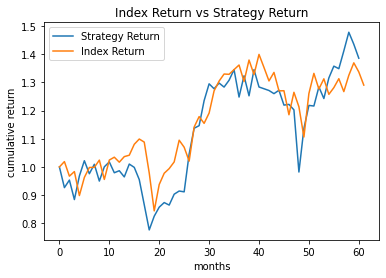

In [47]:
# Visualization
fig, ax = plt.subplots()
plt.plot((1+pflio(return_df,6,3)).cumprod())
plt.plot((1+DJI["mon_ret"].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])

### Strategy II - Intraday Resistance Breakout
* Resistance breakout is a technical trading term which means that the price of the stock has breached a presumed resistance level (determined by the price chart)
    * Resistance - a value that the stock price comes close to it and goes down
    * A breakout happens when the stock price goes over / breaches the resistance. Correspondingly, there is also a `spike in volume` --> indicating stock price is going up
* Choose high volume, high activity stocks for this strategy (pre market movers, historically high volume stocks etc.)
    * Pre Market Mover: a stock that is still moving in price after trading has closed for the trading day, and before it opens for the following trading day
* Define break out rule - will be using price breaching `20` period rolling max/min price in conjunction volume breaching rolling max volume - go long/short stcoks based on the signals
* Define exit/stop loss signal - will be using `previous price plus/minus 20 period ATR` as the `rolling stop loss` price
* Backtest the strategy by calculating cumulative return for each stock

In [24]:
tickers = ["MSFT","AAPL","META","AMZN","INTC", "CSCO","VZ","IBM","TSLA","AMD"]

ohlc_intraday = {} # directory with ohlc value for each stock            
start = datetime.datetime.today()-datetime.timedelta(59)
end = datetime.datetime.today()

# Looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    data = yf.download(ticker,start,end,interval='5m')[["Open","High","Low","Adj Close","Volume"]]
    data.columns = ["Open","High","Low","Close","Volume"]
    data = data.between_time('09:35', '16:00')
    ohlc_intraday[ticker] = data
    ohlc_intraday[ticker].dropna(inplace=True,how="all")

tickers = ohlc_intraday.keys() # redefine tickers variable after removing any tickers with corrupted data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [34]:
def ATR(DF, n):
    df = DF.copy()
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = df['High'] - df['Close'].shift(1)
    df['L-PC'] = df['Low'] - df['Close'].shift(1)
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis = 1, skipna=False)
#     df['ATR'] = df['TR'].ewm(com=n, min_periods=n).mean()
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2['ATR']

def CAGR(DF):
    df = DF.copy()
    df['cum_return'] = (1+df['ret']).cumprod()
    n = len(df)/(252*78)
    CAGR = (df['cum_return'].tolist()[-1]) ** (1/n) - 1
    return CAGR

def volatility(DF):
    df = DF.copy()
    vol = df['ret'].std() * np.sqrt(252*78)
    return vol

def sharpe(DF, rf):
    df = DF.copy()
    sharpe = (CAGR(df) - rf) / volatility(df)
    return sharpe

def MAX_DD(DF):
    df = DF.copy()
    df['cum_return'] = (1+df['ret']).cumprod()
    df['cum_rolling_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_rolling_max'] - df['cum_return']
    return (df['drawdown']/df['cum_rolling_max']).max()

In [26]:
################################Backtesting####################################

# calculating ATR and rolling max price for each stock and consolidating this info by stock in a separate dataframe
ohlc_dict = copy.deepcopy(ohlc_intraday)
tickers_signal = {}
tickers_ret = {}
for ticker in tickers:
    print("calculating ATR and rolling max price for ",ticker)
    ohlc_dict[ticker]["ATR"] = ATR(ohlc_dict[ticker],20)
    ohlc_dict[ticker]["roll_max_cp"] = ohlc_dict[ticker]["High"].rolling(20).max()
    ohlc_dict[ticker]["roll_min_cp"] = ohlc_dict[ticker]["Low"].rolling(20).min()
    ohlc_dict[ticker]["roll_max_vol"] = ohlc_dict[ticker]["Volume"].rolling(20).max()
    ohlc_dict[ticker].dropna(inplace=True)
    tickers_signal[ticker] = ""
    tickers_ret[ticker] = [0]

calculating ATR and rolling max price for  MSFT
calculating ATR and rolling max price for  AAPL
calculating ATR and rolling max price for  META
calculating ATR and rolling max price for  AMZN
calculating ATR and rolling max price for  INTC
calculating ATR and rolling max price for  CSCO
calculating ATR and rolling max price for  VZ
calculating ATR and rolling max price for  IBM
calculating ATR and rolling max price for  TSLA
calculating ATR and rolling max price for  AMD


In [27]:
# identifying signals and calculating daily return (stop loss factored in)
for ticker in tickers:
    print("calculating returns for ",ticker)
    
    ### Update the signals for a particular row
    for i in range(1,len(ohlc_dict[ticker])):
        if tickers_signal[ticker] == "":
            tickers_ret[ticker].append(0)
            
            ## volume i can only be the same as the rolling max volume i --> there is no possibility that it will be 1.5 times
            if ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i] and \
                ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Buy"
            elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Sell"
        
        elif tickers_signal[ticker] == "Buy":
            if ohlc_dict[ticker]["Low"][i]<ohlc_dict[ticker]["Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1]:
                tickers_signal[ticker] = ""
                tickers_ret[ticker].append(((ohlc_dict[ticker]["Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1])/ohlc_dict[ticker]["Close"][i-1])-1)
            elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Sell"
                tickers_ret[ticker].append((ohlc_dict[ticker]["Close"][i]/ohlc_dict[ticker]["Close"][i-1])-1)
            else:
                tickers_ret[ticker].append((ohlc_dict[ticker]["Close"][i]/ohlc_dict[ticker]["Close"][i-1])-1)
                
        elif tickers_signal[ticker] == "Sell":
            if ohlc_dict[ticker]["High"][i]>ohlc_dict[ticker]["Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]:
                tickers_signal[ticker] = ""
                tickers_ret[ticker].append((ohlc_dict[ticker]["Close"][i-1]/(ohlc_dict[ticker]["Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]))-1)
            elif ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Buy"
                tickers_ret[ticker].append((ohlc_dict[ticker]["Close"][i-1]/ohlc_dict[ticker]["Close"][i])-1)
            else:
                tickers_ret[ticker].append((ohlc_dict[ticker]["Close"][i-1]/ohlc_dict[ticker]["Close"][i])-1)
                
    ohlc_dict[ticker]["ret"] = np.array(tickers_ret[ticker])

calculating returns for  MSFT
calculating returns for  AAPL
calculating returns for  META
calculating returns for  AMZN
calculating returns for  INTC
calculating returns for  CSCO
calculating returns for  VZ
calculating returns for  IBM
calculating returns for  TSLA
calculating returns for  AMD


In [40]:
## Calculate overall strategy's KPIs
strategy_df = pd.DataFrame()
for ticker in tickers:
    strategy_df[ticker] = ohlc_dict[ticker]["ret"]
strategy_df["ret"] = strategy_df.mean(axis=1)  ## the capital is allocated equally for each ticker

print("Sharpe Ratio for this strategy = {}".format(sharpe(strategy_df,0.025)))
print("CAGR for this strategy = {}".format(CAGR(strategy_df)))
print("Maximum Drawdown for this strategy = {}".format(MAX_DD(strategy_df)))

Sharpe Ratio for this strategy = 7.173668116957907
CAGR for this strategy = 0.2525033410457578
Maximum Drawdown for this strategy = 0.004698900216075817


<Axes: xlabel='Datetime'>

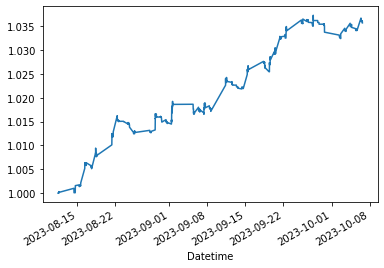

In [39]:
## Vizualization of strategy return
(1+strategy_df["ret"]).cumprod().plot()  ## If we invest 1 dollar, what the return will be at the end

In [44]:
## Calculate individual stock's KPIs
cagr = {}
sharpe_ratios = {}
max_drawdown = {}
for ticker in tickers:
    print("calculating KPIs for ",ticker)      
    cagr[ticker] =  CAGR(ohlc_dict[ticker])
    sharpe_ratios[ticker] =  sharpe(ohlc_dict[ticker],0.025)
    max_drawdown[ticker] =  MAX_DD(ohlc_dict[ticker])

KPI_df = pd.DataFrame([cagr,sharpe_ratios,max_drawdown],index=["Return","Sharpe Ratio","Max Drawdown"])      
KPI_df.T

calculating KPIs for  MSFT
calculating KPIs for  AAPL
calculating KPIs for  META
calculating KPIs for  AMZN
calculating KPIs for  INTC
calculating KPIs for  CSCO
calculating KPIs for  VZ
calculating KPIs for  IBM
calculating KPIs for  TSLA
calculating KPIs for  AMD


,Return,Sharpe Ratio,Max Drawdown
MSFT,-0.041492,-1.373632,0.019424
AAPL,-0.055529,-1.472172,0.020327
META,0.253496,2.306007,0.032094
AMZN,0.247428,2.292170,0.017384
INTC,0.849622,7.020866,0.013136
CSCO,-0.132921,-7.378947,0.021959
VZ,0.052783,0.572807,0.011500
IBM,0.164931,2.746074,0.003716
TSLA,1.380635,7.515098,0.027464
AMD,0.381787,3.920271,0.014321


### Strategy III - Intraday Renko OBV
* Chose high volume, high activity stocks for this strategy (pre-market movers, historically high volume stocks etc.)
* Buy Signal
    * Renko bar greater than or equal to 2
    * 5-day OBV slope greater than 30 degrees
    * Exit if Renko bar is less than 2
* Sell Signal
    * Renko bar less than or equal than -2
    * 5-day OBV slope less than -30 degrees
    * Exit if Renko bar is greater than -2

In [1]:
from stocktrends import Renko
import statsmodels.api as sm
from alpha_vantage.timeseries import TimeSeries
import copy

/Users/jinlinsi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [12]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

def slope(ser, n):
    "function to calculate the slope of n consecutive points on a plot"
    slopes = [i*0 for i in range(n-1)]
    for i in range(n, len(ser)+1):
        y = ser[i-n:i]
        x = np.array(range(n))
        y_scaled = (y - y.min())/(y.max() - y.min())
        x_scaled = (x - x.min()) / (x.max() - x.min())
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled, x_scaled)
        results = model.fit()
        slopes.append(results.params[-1]) ## append the slopes only (no constants)
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

In [15]:
slope(pd.Series([1, 2, 3, 4, 5]), 3)

array([ 0.,  0., 45., 45., 45.])